In [3]:
import pandas as pd
sentiment = pd.read_csv("fear_greed.csv")    
trades = pd.read_csv("historical_data.csv") 

Preprocess Data for Visualizations

In [5]:
# Sentiment (seconds)
sentiment['date'] = pd.to_datetime(sentiment['timestamp'], unit='s')

# Trades (milliseconds with scientific notation)
trades['date'] = pd.to_datetime(trades['Timestamp'].astype('int64'), unit='ms')


Sentiment Trend Over Time

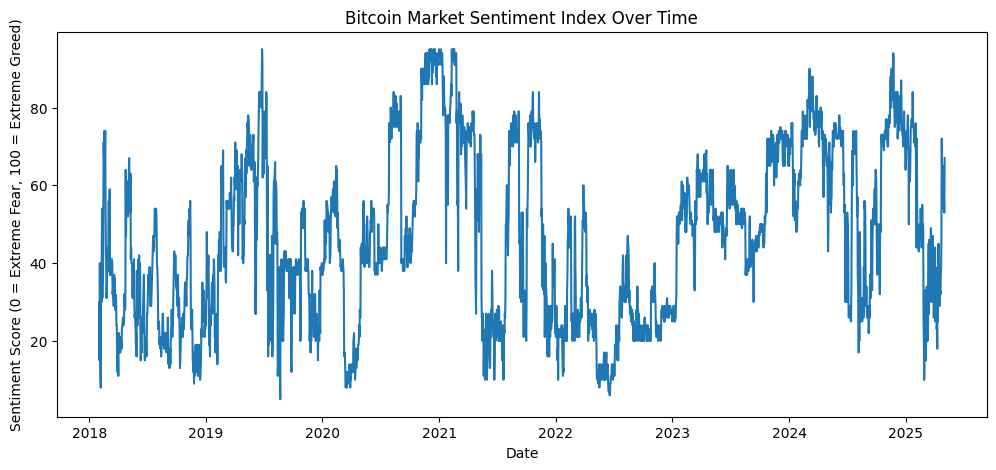

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(sentiment['date'], sentiment['value'])
plt.title("Bitcoin Market Sentiment Index Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (0 = Extreme Fear, 100 = Extreme Greed)")
plt.show()


Count of Market Sentiment States

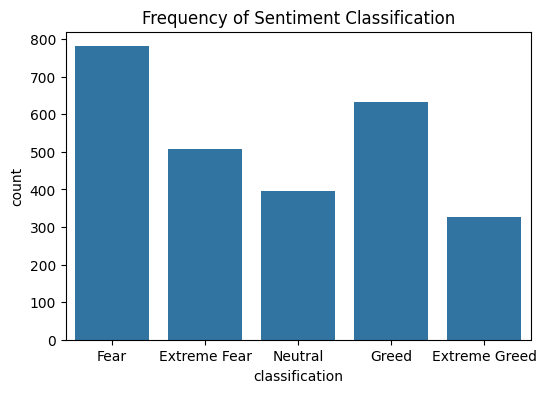

In [7]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=sentiment, x='classification')
plt.title("Frequency of Sentiment Classification")
plt.show()


Trade Volume Over Time

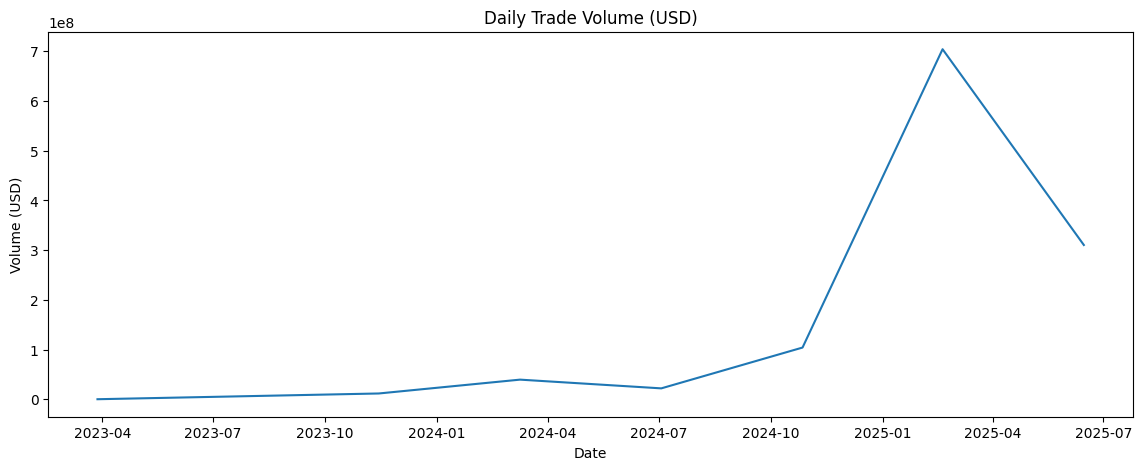

In [8]:
trades['trade_usd'] = trades['Size USD']   # rename for clarity

daily_volume = trades.groupby(trades['date'].dt.date)['trade_usd'].sum().reset_index()

plt.figure(figsize=(14,5))
plt.plot(daily_volume['date'], daily_volume['trade_usd'])
plt.title("Daily Trade Volume (USD)")
plt.xlabel("Date")
plt.ylabel("Volume (USD)")
plt.show()


Daily Total PnL Trend

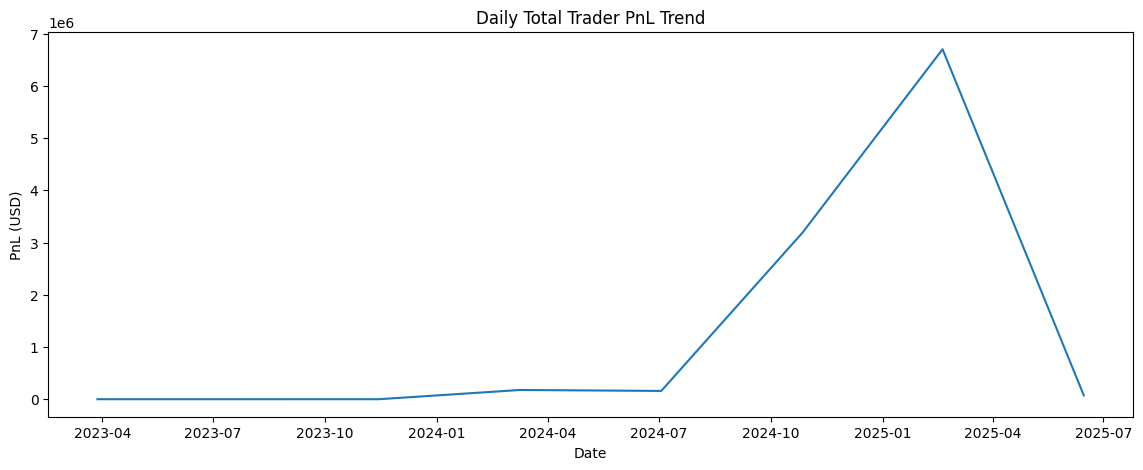

In [15]:
daily_pnl = trades.groupby(trades['date'].dt.date)['Closed PnL'].sum().reset_index()

plt.figure(figsize=(14,5))
plt.plot(daily_pnl['date'], daily_pnl['Closed PnL'])
plt.title("Daily Total Trader PnL Trend")
plt.xlabel("Date")
plt.ylabel("PnL (USD)")
plt.show()


Overlay Market Sentiment & Profit

In [22]:
# convert Timestamp IST to datetime with Indian timezone
trades['date'] = pd.to_datetime(trades['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Normalize to date only (00:00) when aggregating daily PnL
trades['date_only'] = trades['date'].dt.normalize()


In [23]:
sentiment['date_only'] = sentiment['date'].dt.normalize()


In [24]:
daily_pnl = trades.groupby('date_only')['Closed PnL'].sum().reset_index()


In [25]:
merged = pd.merge(
    sentiment[['date_only','value','classification']],
    daily_pnl,
    on='date_only',
    how='inner'
)


In [26]:
merged.rename(columns={'date_only':'date'}, inplace=True)


Plot Sentiment vs Trader Profitability

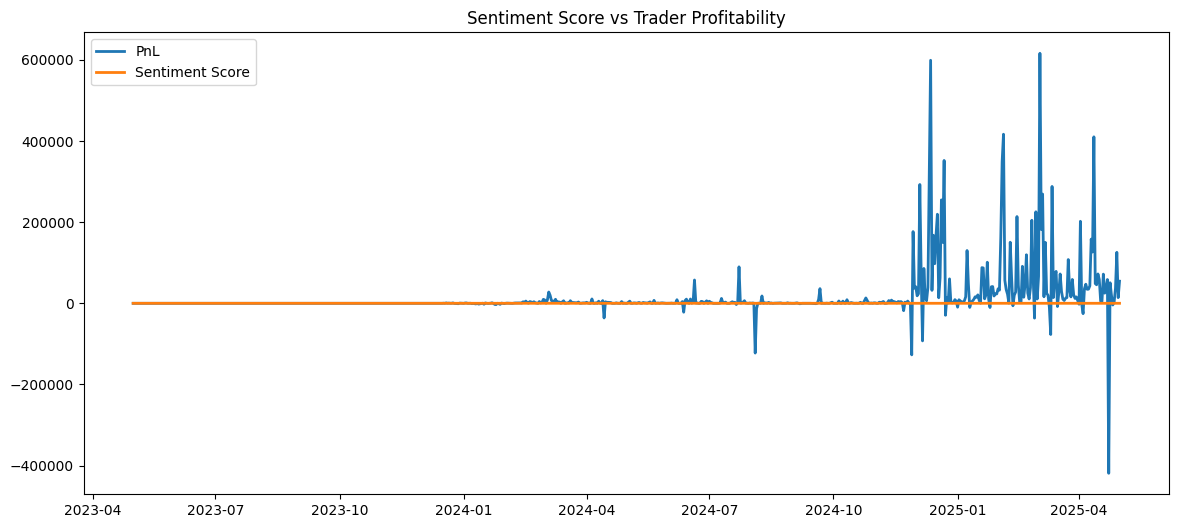

In [27]:
plt.figure(figsize=(14,6))

plt.plot(merged['date'], merged['Closed PnL'], label="PnL", linewidth=2)
plt.plot(merged['date'], merged['value'], label="Sentiment Score", linewidth=2)

plt.title("Sentiment Score vs Trader Profitability")
plt.legend()
plt.show()
